# heart.csv 딥러닝 분류

### heart.csv 파일 불러오기

In [16]:
import pandas as pd
import numpy as np

file_path = "C:/Ai-class/heart.csv"  
df = pd.read_csv(file_path)

# 데이터프레임 확인
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


### 결측치 확인

In [19]:
# 각 열별 결측치 개수 확인
missing_values = df.isnull().sum()

# 결측치 비율(%) 계산
missing_ratio = (df.isnull().sum() / len(df)) * 100

# 결과 출력
missing_df = pd.DataFrame({"결측치 개수": missing_values, "결측치 비율(%)": missing_ratio})
print(missing_df)

          결측치 개수  결측치 비율(%)
age            0        0.0
sex            0        0.0
cp             0        0.0
trestbps       0        0.0
chol           0        0.0
fbs            0        0.0
restecg        0        0.0
thalach        0        0.0
exang          0        0.0
oldpeak        0        0.0
slope          0        0.0
ca             0        0.0
thal           0        0.0
target         0        0.0


### 레이블 비율 확인

In [22]:
print(df["target"].value_counts())  # 클래스 개수 출력
print(df["target"].value_counts(normalize=True) * 100)  # 비율(%) 출력

target
1    165
0    138
Name: count, dtype: int64
target
1    54.455446
0    45.544554
Name: proportion, dtype: float64


### 입력(X)와 타깃(y) 분리

In [25]:
# 입력(X)와 타깃(y) 분리
X = df.drop(columns=["target"])
y = df["target"] 

# 확인
print(X.head())  # 입력 데이터
print(y.head())  # 레이블 (타깃 변수)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


### 필요한 라이브러리

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.ensemble import RandomForestClassifier #RF
from sklearn.svm import SVC #SVM
from sklearn.linear_model import LogisticRegression #LR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

### X, y 훈련 데이터, 테스트 데이터 나누기

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

### DT

In [79]:
# DT 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 예측 수행
pred_dt = dt_model.predict(X_test)

In [81]:
print("\n📌 [1] accuracy 출력")
accuracy = accuracy_score(y_test, pred_dt)
print(f"DT 정확도: {accuracy:.4f}")

print("\n📌 [2] confusion matrix 출력") 
print(confusion_matrix(y_test, pred_dt))


📌 [1] accuracy 출력
DT 정확도: 0.7869

📌 [2] confusion matrix 출력
[[22  5]
 [ 8 26]]


### RF

In [84]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

pred_rf = rf_model.predict(X_test)

In [86]:
print("\n📌 [1] 정확도 출력")
accuracy = accuracy_score(y_test, pred_rf)
print(f"RF 정확도: {accuracy:.4f}")

print("\n📌 [2] confusion matrix 출력") 
print(confusion_matrix(y_test, pred_rf))


📌 [1] 정확도 출력
RF 정확도: 0.8525

📌 [2] confusion matrix 출력
[[22  5]
 [ 4 30]]


### SVM

In [89]:
# 1. SVM 모델 생성 및 학습
svm_model = SVC(kernel="linear", random_state=42)  # 선형 커널 사용
svm_model.fit(X_train, y_train)

# 2. 예측
y_pred_svm = svm_model.predict(X_test)

In [90]:
print("\n📌 [1] 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM 정확도: {accuracy:.4f}")

print("\n📌 [2] confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_svm))


📌 [1] 정확도 출력
SVM 정확도: 0.8197

📌 [2] confusion matrix 출력
[[20  7]
 [ 4 30]]


### LR

In [94]:
# 4. 로지스틱 회귀 모델 생성 및 학습
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# 5. 예측 수행
y_pred_lr = lr_model.predict(X_test)

In [96]:
print("\n📌 [1] 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"LR 정확도: {accuracy:.4f}")

print("\n📌 [2] confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_lr))


📌 [1] 정확도 출력
LR 정확도: 0.8525

📌 [2] confusion matrix 출력
[[21  6]
 [ 3 31]]


### KNN

In [103]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 모델 생성 및 학습 (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_knn = knn.predict(X_test)

In [105]:
print("\n📌 [1] 정확도 출력")
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN 정확도: {accuracy:.4f}")

print("\n📌 [2] confusion matrix 출력") 
print(confusion_matrix(y_test, y_pred_knn))


📌 [1] 정확도 출력
KNN 정확도: 0.8197

📌 [2] confusion matrix 출력
[[21  6]
 [ 5 29]]


## 딥러닝

### 필요한 라이브러리

In [113]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from tensorflow.keras.optimizers import Adam

In [114]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


### 모델 학습

In [117]:
model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\hash0\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 846 (3.30 KB)

 Trainable params: 846 (3.30 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=25,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4973 - loss: 0.7120 - val_accuracy: 0.4426 - val_loss: 0.6880
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5158 - loss: 0.6867 - val_accuracy: 0.5738 - val_loss: 0.6763
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6461 - loss: 0.6853 - val_accuracy: 0.7705 - val_loss: 0.6680
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7010 - loss: 0.6765 - val_accuracy: 0.8033 - val_loss: 0.6604
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7146 - loss: 0.6665 - val_accuracy: 0.7869 - val_loss: 0.6512
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7412 - loss: 0.6553 - val_accuracy: 0.7869 - val_loss: 0.6399
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7341 - loss: 0.6455 - val_accuracy: 0.7869 - val_loss: 0.6244
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7483 - loss: 0.6240 - val_accuracy: 0.7869 - va

### 결과 출력

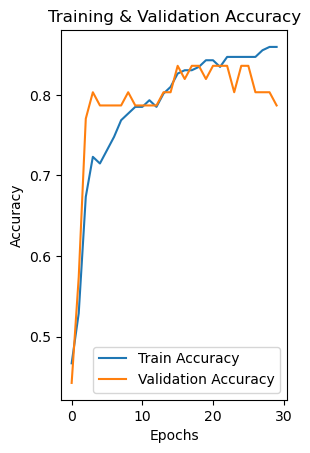

In [121]:
import matplotlib.pyplot as plt

# 모델 학습 과정에서 기록된 loss 및 accuracy 가져오기
history = model_history.history

# 🎯 정확도(accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.show()